Estancia pertinente en UCI

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# bibliotecas para preprocesamiento
from sklearn.model_selection import train_test_split
# bibliotecas para modelado
from sklearn.ensemble import RandomForestClassifier
# bibliotecas para evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  # Codificar variables categóricas
from sklearn.ensemble import IsolationForest # Algoritmo de detección de anomalías

In [4]:
# Se carga el dataset
df = pd.read_excel('uci.xlsx', sheet_name='FUENTE MODIFICADA')

/Users/andreavalencia/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [5]:
# revisar la cantidad de datos del dataset original
df.shape

(1916, 44)

In [6]:
# Mostrar las primeras 5 filas del dataset utilizando el método dataframe.head()
df.head(6)

,Sigla UnOrg.enfermería,Fecha de admisión,Nº documento,Episodio,Apellido 1,Apellido 2,Primer Nombre,Segundo Nombre,Edad,Sexo,...,GLOSA PROBABLE EVITADA,NÚMERO DE RX SIN COMENTAR,COMENTARIO AUDITORIA,CAMBIO CATEGORIA DESDE COORDINACIÓN,CAMBIO FACTURACIÓN,GLOSA EFECTIVA NOTAS CRÉDITO,FACTURA NOTAS CRÉDITO,MES REVISIÓN,GLOSA EFECTIVA PREGLOSA,FECHA GLOSADA
0,T4P7 UCI,2024-03-14,48570565,11781030,FAJARDO,VICTORIA,ADELINDA,,68,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
1,T4P7 UCI,2024-03-02,31957509,11736934,LOZANO,RESTREPO,SOLANGEN,,60,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
2,T4P7 UCI,2024-02-19,14947836,11689275,SANDOVAL,REINEL,LUIS,ANGEL,77,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
3,T3P2 UCI AdA,2024-03-09,31219066,11764746,CHALA,,DIONISIA,,74,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
4,T3P2 UCI AdA,2024-03-03,31866944,11735955,CRUZ,BRICEÑO,MILENA,,62,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
5,T3P2 UCI AdA,2024-03-13,16243245,11668613,POTES,AGUDELO,JOSE,SONNY,75,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN


In [7]:
# Comprobar el tipo de datos
df.dtypes

Sigla UnOrg.enfermería                                object
Fecha de admisión                             datetime64[ns]
Nº documento                                           int64
Episodio                                               int64
Apellido 1                                            object
Apellido 2                                            object
Primer Nombre                                         object
Segundo Nombre                                        object
Edad                                                   int64
Sexo                                                  object
Cama                                                  object
Habit.                                                object
Aseguradora                                           object
Categ.tratamiento                                     object
Fecha Ingreso Uci                                     object
Fecha de seguimiento                          datetime64[ns]
Dias  Estancia en  UCI  

In [8]:
# Mostrar los nombres de las columnas
df.columns

Index(['Sigla UnOrg.enfermería', 'Fecha de admisión', 'Nº documento',
       'Episodio', 'Apellido 1', 'Apellido 2', 'Primer Nombre',
       'Segundo Nombre', 'Edad', 'Sexo', 'Cama', 'Habit.', 'Aseguradora',
       'Categ.tratamiento', 'Fecha Ingreso Uci', 'Fecha de seguimiento',
       'Dias  Estancia en  UCI', 'Criterio general', 'Criterio especifico',
       'Diagnostico', 'Cumple Categ.tratamiento para:',
       'Cumple criterio Aislamiento UCI',
       'Observaciones Auditoria Medica FCVL', 'Medico Auditor responsable',
       'Observaciones Coordinador Md-adm UCI',
       'Fecha de respuesta Coordinador Md adm UCIL',
       'Seguimiento ( a cargo auditoria FVL)', 'Impacto valorizado ',
       'MÉDICO TRATANTE ', 'AUDITORIA DE ACUERDO CON CRITERIO ',
       'CAMBIO EFECTIVO ', 'RX TORAX ', 'COMENTADA  HC ',
       'INTERVENCION AUDITORIA ', 'GLOSA PROBABLE EVITADA ',
       'NÚMERO DE RX SIN COMENTAR ', 'COMENTARIO AUDITORIA ',
       'CAMBIO CATEGORIA DESDE COORDINACIÓN', 'CAMBIO

In [9]:
# Eliminar columnas específicas del DataFrame
df.drop(columns=['Sigla UnOrg.enfermería', 'Nº documento',
       'Apellido 1',
       'Apellido 2',
       'Primer Nombre',
       'Segundo Nombre',
       'Cama',
       'Habit.',
       'Categ.tratamiento',
       'Observaciones Auditoria Medica FCVL',
       'Observaciones Coordinador Md-adm UCI',
       'Fecha de respuesta Coordinador Md adm UCIL',
       'Seguimiento ( a cargo auditoria FVL)',
       'Impacto valorizado ',
       'MÉDICO TRATANTE ',
       'AUDITORIA DE ACUERDO CON CRITERIO ',
       'CAMBIO EFECTIVO ',
       'RX TORAX ', 'COMENTADA  HC ',
       'INTERVENCION AUDITORIA ',
       'NÚMERO DE RX SIN COMENTAR ',
       'COMENTARIO AUDITORIA ',
       'CAMBIO CATEGORIA DESDE COORDINACIÓN',
       'CAMBIO FACTURACIÓN '], axis=1, inplace=True)

In [10]:
# Mostrar las primeras 5 filas del dataset despues de modificar sus columnas
df.head()

,Fecha de admisión,Episodio,Edad,Sexo,Aseguradora,Fecha Ingreso Uci,Fecha de seguimiento,Dias Estancia en UCI,Criterio general,Criterio especifico,Diagnostico,Cumple Categ.tratamiento para:,Cumple criterio Aislamiento UCI,Medico Auditor responsable,GLOSA PROBABLE EVITADA,GLOSA EFECTIVA NOTAS CRÉDITO,FACTURA NOTAS CRÉDITO,MES REVISIÓN,GLOSA EFECTIVA PREGLOSA,FECHA GLOSADA
0,2024-03-14,11781030,68,F,ASMET SALUD,2024-03-14 00:00:00,2024-03-14,0,CARDIOVASCULAR,UCI-IAM,Infarto agudo de miocardio sin elevación del s...,UCI ADULTO,NO APLICA,Dr. Eliana Carabali,NaN,NaN,NaN,3,NaN,NaN
1,2024-03-02,11736934,60,F,NUEVA EPS,2024-03-02 00:00:00,2024-03-14,12,CARDIOVASCULAR,UCI-INESTABILIDAD CARDIOVASCULAR,Rechazo agudo clínico con disfunción ventricul...,UCI INTERMEDIO,NO APLICA,Enf. Luz Viviana Goyes,NaN,NaN,NaN,3,NaN,NaN
2,2024-02-19,11689275,77,M,NUEVA EPS,2024-02-21 00:00:00,2024-03-14,22,CARDIOVASCULAR,UCI-CHOQUE,Choque séptico de origen a establecer\n– Síndr...,UCI AISLAMIENTO,SI,Enf. Luz Viviana Goyes,NaN,NaN,NaN,3,NaN,NaN
3,2024-03-09,11764746,74,F,NUEVA EPS,2024-03-09 00:00:00,2024-03-14,5,CARDIOVASCULAR,UCI-CHOQUE,Choque cardiogénico,UCI ADULTO,NO APLICA,Enf. Luz Viviana Goyes,NaN,NaN,NaN,3,NaN,NaN
4,2024-03-03,11735955,62,F,SALUD TOTAL,2024-03-03 00:00:00,2024-03-14,11,CARDIOVASCULAR,UCI-INESTABILIDAD CARDIOVASCULAR,Disección aórtica Stanford A desde la unión si...,UCI ADULTO,NO APLICA,Enf. Luz Viviana Goyes,NaN,NaN,NaN,3,NaN,NaN


In [12]:
#convertir fecha de ingreso a uci a tipo fecha
df['Fecha Ingreso Uci'] = pd.to_datetime(df['Fecha Ingreso Uci'])

In [13]:
# añadir una columna que calcule los dias desde la admision
df['Dias_admision'] = (df['Fecha Ingreso Uci'] - df['Fecha de admisión']).dt.days

In [14]:
# añadir una columna que calcule los dias desde la admision hasta la fecha de revision
df['Dias_seguimiento'] = (df['Fecha de seguimiento'] - df['Fecha de admisión']).dt.days

In [15]:
# longitud del diagnostico
df['Longitud_diagnostico'] = df['Diagnostico'].str.len()

In [16]:
# Visualizamos los cambios realizados en el dataset
df.head()

,Fecha de admisión,Episodio,Edad,Sexo,Aseguradora,Fecha Ingreso Uci,Fecha de seguimiento,Dias Estancia en UCI,Criterio general,Criterio especifico,...,Medico Auditor responsable,GLOSA PROBABLE EVITADA,GLOSA EFECTIVA NOTAS CRÉDITO,FACTURA NOTAS CRÉDITO,MES REVISIÓN,GLOSA EFECTIVA PREGLOSA,FECHA GLOSADA,Dias_admision,Dias_seguimiento,Longitud_diagnostico
0,2024-03-14,11781030,68,F,ASMET SALUD,2024-03-14,2024-03-14,0,CARDIOVASCULAR,UCI-IAM,...,Dr. Eliana Carabali,NaN,NaN,NaN,3,NaN,NaN,0.0,0,94.0
1,2024-03-02,11736934,60,F,NUEVA EPS,2024-03-02,2024-03-14,12,CARDIOVASCULAR,UCI-INESTABILIDAD CARDIOVASCULAR,...,Enf. Luz Viviana Goyes,NaN,NaN,NaN,3,NaN,NaN,0.0,12,84.0
2,2024-02-19,11689275,77,M,NUEVA EPS,2024-02-21,2024-03-14,22,CARDIOVASCULAR,UCI-CHOQUE,...,Enf. Luz Viviana Goyes,NaN,NaN,NaN,3,NaN,NaN,2.0,24,93.0
3,2024-03-09,11764746,74,F,NUEVA EPS,2024-03-09,2024-03-14,5,CARDIOVASCULAR,UCI-CHOQUE,...,Enf. Luz Viviana Goyes,NaN,NaN,NaN,3,NaN,NaN,0.0,5,19.0
4,2024-03-03,11735955,62,F,SALUD TOTAL,2024-03-03,2024-03-14,11,CARDIOVASCULAR,UCI-INESTABILIDAD CARDIOVASCULAR,...,Enf. Luz Viviana Goyes,NaN,NaN,NaN,3,NaN,NaN,0.0,11,193.0


In [17]:
# transformar la variable categorica a numerica (crear columna dummie del sexo (1 si es hombre, 0 si es mujer))
df = pd.get_dummies(df, columns=['Sexo'], prefix=['Sexo_es'])

In [19]:
# transformar la variable categorica a numerica (crear columna dummie del criterio general
df = pd.get_dummies(df, columns=['Criterio general'], prefix=['Criterio_general_es'])

In [20]:
# transformar la variable categorica a numerica (crear columna dummie del criterio especifico
df = pd.get_dummies(df, columns=['Criterio especifico'], prefix=['Criterio_especifico_es'])

In [21]:
# transformar la variable categorica a numerica (crear columna dummie del criterio especifico
df = pd.get_dummies(df, columns=['Cumple Categ.tratamiento para:'], prefix=['Categ_tto_es'])

In [22]:
# Visualizamos los cambios realizados en el dataset
df.head()

,Fecha de admisión,Episodio,Edad,Aseguradora,Fecha Ingreso Uci,Fecha de seguimiento,Dias Estancia en UCI,Diagnostico,Cumple criterio Aislamiento UCI,Medico Auditor responsable,...,Criterio_especifico_es_UCIN-DESTETE VENTILATORIO RESPIRATORIO,Criterio_especifico_es_UCIN-REQUERIMIENTO ENFERMERIA INTERMEDIO,Criterio_especifico_es_VIGILANCIA NEUROLOGICA,Categ_tto_es_PISO AISLAMIENTO,Categ_tto_es_PISO GENERAL,Categ_tto_es_SALIDA,Categ_tto_es_UCI ADULTO,Categ_tto_es_UCI AISLAMIENTO,Categ_tto_es_UCI INTERMEDIO,Categ_tto_es_UCIADU
0,2024-03-14,11781030,68,ASMET SALUD,2024-03-14,2024-03-14,0,Infarto agudo de miocardio sin elevación del s...,NO APLICA,Dr. Eliana Carabali,...,False,False,False,False,False,False,True,False,False,False
1,2024-03-02,11736934,60,NUEVA EPS,2024-03-02,2024-03-14,12,Rechazo agudo clínico con disfunción ventricul...,NO APLICA,Enf. Luz Viviana Goyes,...,False,False,False,False,False,False,False,False,True,False
2,2024-02-19,11689275,77,NUEVA EPS,2024-02-21,2024-03-14,22,Choque séptico de origen a establecer\n– Síndr...,SI,Enf. Luz Viviana Goyes,...,False,False,False,False,False,False,False,True,False,False
3,2024-03-09,11764746,74,NUEVA EPS,2024-03-09,2024-03-14,5,Choque cardiogénico,NO APLICA,Enf. Luz Viviana Goyes,...,False,False,False,False,False,False,True,False,False,False
4,2024-03-03,11735955,62,SALUD TOTAL,2024-03-03,2024-03-14,11,Disección aórtica Stanford A desde la unión si...,NO APLICA,Enf. Luz Viviana Goyes,...,False,False,False,False,False,False,True,False,False,False


In [23]:
# crear una columna para transformar la variable categorica a numerica para identificar cuales tuvieron glosa
df['glosa'] = df['GLOSA EFECTIVA NOTAS CRÉDITO'].apply(lambda x: True if x >0 else False)

In [24]:
# filtrar el df y seleccionar únicamente las filas en las que la columna 'glosa' tiene un valor de True
df[df['glosa'] == True]

,Fecha de admisión,Episodio,Edad,Aseguradora,Fecha Ingreso Uci,Fecha de seguimiento,Dias Estancia en UCI,Diagnostico,Cumple criterio Aislamiento UCI,Medico Auditor responsable,...,Criterio_especifico_es_UCIN-REQUERIMIENTO ENFERMERIA INTERMEDIO,Criterio_especifico_es_VIGILANCIA NEUROLOGICA,Categ_tto_es_PISO AISLAMIENTO,Categ_tto_es_PISO GENERAL,Categ_tto_es_SALIDA,Categ_tto_es_UCI ADULTO,Categ_tto_es_UCI AISLAMIENTO,Categ_tto_es_UCI INTERMEDIO,Categ_tto_es_UCIADU,glosa
10,2024-03-04,11737459,91,SANITAS,2024-03-04,2024-03-14,10,Shock séptico de origen pulmonar,NO APLICA,Enf. Luz Viviana Goyes,...,False,False,False,False,False,True,False,False,False,True
17,2024-03-06,11748772,53,COLSANITAS,2024-03-14,2024-03-14,0,Postoperatorio de pancreatoduodenectomía en y ...,NO APLICA,Enf. Luz Viviana Goyes,...,False,False,False,False,False,True,False,False,False,True
25,2024-02-08,11637144,74,NUEVA EPS,2024-02-16,2024-03-14,27,Postoperatorio de pancreaticoduodenectomia to...,NO APLICA,Enf. Luz Viviana Goyes,...,False,False,False,False,False,True,False,False,False,True
26,2024-02-08,11649380,70,NUEVA EPS,2024-02-08,2024-03-14,35,Alteración del estado de consciencia\n1.1 Cri...,SI,Enf. Luz Viviana Goyes,...,False,False,False,False,False,False,True,False,False,True
29,2024-02-14,11669894,58,SALUD TOTAL,2024-03-13,2024-03-14,1,EXPLORACON DE CELDA PARATIROIDEA IZQUIERDA + T...,NO APLICA,Enf. Luz Viviana Goyes,...,False,False,False,False,False,False,False,False,True,True
30,2024-03-05,11746971,37,SANITAS,2024-03-13,2024-03-14,1,Tiroidectomia Total 12.03.2024,NO APLICA,Enf. Luz Viviana Goyes,...,False,False,False,False,False,False,False,False,True,True
42,2024-03-04,11737459,91,SANITAS,2024-03-04,2024-03-18,14,Shock séptico de origen pulmonar,NO APLICA,Enf. Luz Viviana Goyes,...,False,False,False,False,False,True,False,False,False,True
49,2024-02-22,11705816,59,NUEVA EPS,2024-03-13,2024-03-18,5,\n1. Neumonía multilobar nosocomial a estudio....,NO,Dr. Eliana Carabali,...,False,False,False,False,False,False,False,True,False,True
57,2024-03-11,11765432,76,SANITAS,2024-03-19,2024-03-21,2,"Hipertensión pulmonar del grupo IV, tromboembo...",NO APLICA,Enf. Luz Viviana Goyes,...,False,False,False,False,False,True,False,False,False,True
69,2024-03-04,11737459,91,SANITAS,2024-03-04,2024-03-21,17,Shock séptico de origen pulmonar,NO APLICA,Enf. Luz Viviana Goyes,...,False,False,False,False,False,True,False,False,False,True


In [26]:
# crear instancia para inicializar el encoder
le = LabelEncoder()
# reemplazar los valores de la columna 'aseguradora' por valores numericos
df['Aseguradora'] = le.fit_transform(df['Aseguradora'])

In [29]:
# análisis de los valores nulos (o faltantes) en cada columna
df.isnull().sum().sort_values(ascending=False)

FECHA GLOSADA                                           1908
GLOSA EFECTIVA PREGLOSA                                 1889
FACTURA NOTAS CRÉDITO                                   1868
GLOSA EFECTIVA NOTAS CRÉDITO                            1868
GLOSA PROBABLE EVITADA                                  1824
                                                        ... 
Episodio                                                   0
Criterio_especifico_es_UCI-CHOQUE                          0
Criterio_especifico_es_UCI-CRITERIO DEL INTENSIVISTA       0
Criterio_especifico_es_UCI-CRITICO QUEMADO                 0
glosa                                                      0
Length: 81, dtype: int64

In [31]:
# Reemplazar los valores nulos por 0
df.fillna(0, inplace=True)  

In [ ]:
X = df[['Edad',
       'Aseguradora',
       'Dias  Estancia en  UCI',
       'Categ_tto_es_PISO AISLAMIENTO', 'Categ_tto_es_PISO GENERAL',
       'Categ_tto_es_SALIDA', 'Categ_tto_es_UCI ADULTO',
       'Categ_tto_es_UCI AISLAMIENTO', 'Categ_tto_es_UCI INTERMEDIO',
       'Categ_tto_es_UCIADU', 'Dias_admision',
       'Dias_seguimiento', 'Longitud_diagnostico', 'Sexo_es_F', 'Sexo_es_M',
       'Criterio_general_es_CARDIOVASCULAR', 'Criterio_general_es_ENDOCRINO',
       'Criterio_general_es_GASTROINTESTINAL',
       'Criterio_general_es_GRAN QUEMADOS', 'Criterio_general_es_MISCELÁNEAS',
       'Criterio_general_es_NEUROLOGICO', 'Criterio_general_es_QUIRURGICO',
       'Criterio_general_es_RENAL', 'Criterio_general_es_RESPIRATORIO',
       'Criterio_general_es_UCI-CHOQUE',
       'Criterio_especifico_es_AISL-UCI-RESPIRATORIA',
       'Criterio_especifico_es_COMPROMISO NEUROLOGICO',
       'Criterio_especifico_es_LESION NEUROLOGICA MAYOR',
       'Criterio_especifico_es_RESPIRATORIO',
       'Criterio_especifico_es_TRAUMA CRANEOENCEFALICO',
       'Criterio_especifico_es_TRAUMA CRANEOENCEFALICO  SEVERO',
       'Criterio_especifico_es_UCI-ABDOMEN ABIERTO-FISTULAS',
       'Criterio_especifico_es_UCI-ACCIDENTE CEREBROVASCULAR ISQUÉMICO',
       'Criterio_especifico_es_UCI-ALTERACION AGUDA ESTADO DE CONCIENCIA',
       'Criterio_especifico_es_UCI-ALTERACION ENDOCRINA AGUDA y/o COMPLEJA',
       'Criterio_especifico_es_UCI-CHOQUE',
       'Criterio_especifico_es_UCI-CRITERIO DEL INTENSIVISTA',
       'Criterio_especifico_es_UCI-CRITICO QUEMADO',
       'Criterio_especifico_es_UCI-ENFERMEDAD AGUDA EN MULTIMORBIDO',
       'Criterio_especifico_es_UCI-FALLA HEPÁTICA',
       'Criterio_especifico_es_UCI-FALLA RENAL AGUDA',
       'Criterio_especifico_es_UCI-FALLA RESPIRATORIA AGUDA',
       'Criterio_especifico_es_UCI-FALLA RESPIRATORIA CRÓNICA AGUDIZADA',
       'Criterio_especifico_es_UCI-GRAN QUEMADO',
       'Criterio_especifico_es_UCI-HSA VASOESPASMO ',
       'Criterio_especifico_es_UCI-IAM',
       'Criterio_especifico_es_UCI-INESTABILIDAD CARDIOVASCULAR',
       'Criterio_especifico_es_UCI-INESTABILIDAD CERVICAL',
       'Criterio_especifico_es_UCI-INESTABILIDAD VIA AEREA',
       'Criterio_especifico_es_UCI-INFECCION SISTEMA NERVIOSO CENTRAL',
       'Criterio_especifico_es_UCI-INJURIA AMBIENTAL',
       'Criterio_especifico_es_UCI-MIONEUROPATIAS',
       'Criterio_especifico_es_UCI-PANCREATITIS GRAVE',
       'Criterio_especifico_es_UCI-PLASMAFERESIS < 48 HORAS',
       'Criterio_especifico_es_UCI-POST QUIRURGICO CIRUGÍA MAYOR',
       'Criterio_especifico_es_UCI-PRIMERAS 24 HORAS POSTQUIRURGICAS RIESGO ANESTESICO',
       'Criterio_especifico_es_UCI-REQUERIMIENTO ENFERMERIA INTENSIVA',
       'Criterio_especifico_es_UCI-SANGRADO ACTIVO-GOTEO SOMATOSTATINA O VASOACTIVO',
       'Criterio_especifico_es_UCI-SEDACION Y ANALGESIA CON MONITORIA CONTINUA',
       'Criterio_especifico_es_UCI-SOPORTE VENTILATORIO (INVASIVO- NO INVASIVO-HIPOXEMIA-HIPERCAPNIA)',
       'Criterio_especifico_es_UCI-TERAPIA RESPIRATORIA INTENSIVA',
       'Criterio_especifico_es_UCI-TRASTORNO ELECTROLÍTICO GRAVE-MODERADO SINTOMATICO',
       'Criterio_especifico_es_UCI-TRASTORNO RITMO CARDIACO REPERC HEMODINAMICA',
       'Criterio_especifico_es_UCIN-CRITERIO DEL INTENSIVISTA',
       'Criterio_especifico_es_UCIN-DESTETE VENTILATORIO RESPIRATORIO  ',
       'Criterio_especifico_es_UCIN-REQUERIMIENTO ENFERMERIA INTERMEDIO',
       'Criterio_especifico_es_VIGILANCIA NEUROLOGICA']]
y = df['glosa']

PROBAR MODELOS

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Precisión del modelo: 0.43


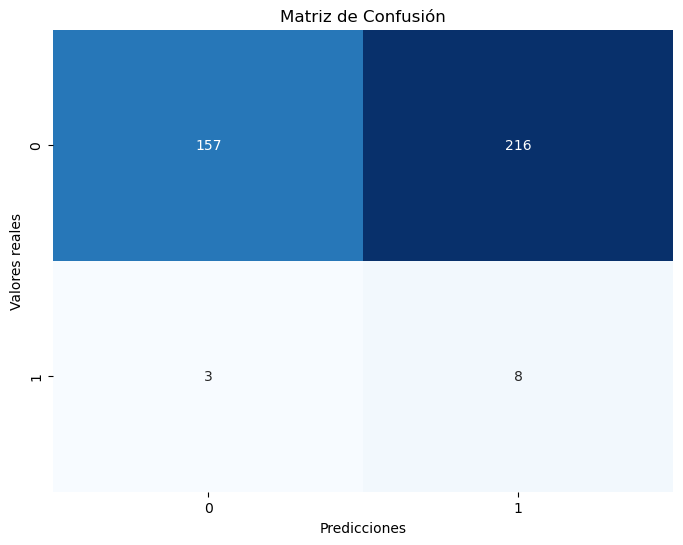


Informe de Clasificación:
              precision    recall  f1-score   support

       False       0.98      0.42      0.59       373
        True       0.04      0.73      0.07        11

    accuracy                           0.43       384
   macro avg       0.51      0.57      0.33       384
weighted avg       0.95      0.43      0.57       384



In [ ]:
# Utliza otro algoritmo y compara los resultados con el anterior

#Importamos el algoritmo Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Utilizarremos los mismos sets de entrenamiento

# Entrenar un modelo de clasificación
# Crear un modelo de clasificación de Naive Bayes
modelo_gnb = GaussianNB()
modelo_gnb.fit(X_train, y_train)

# Paso 5: Evaluación del modelo
y_pred = modelo_gnb.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()
 
# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)


Precisión del modelo: 0.98


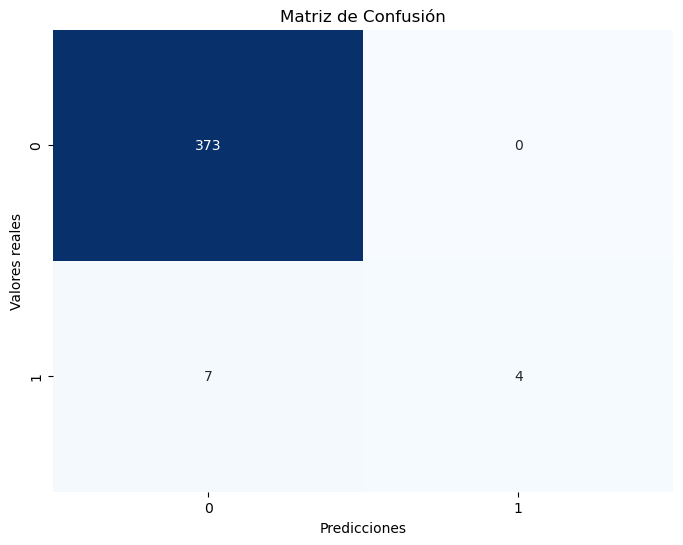


Informe de Clasificación:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       373
        True       1.00      0.36      0.53        11

    accuracy                           0.98       384
   macro avg       0.99      0.68      0.76       384
weighted avg       0.98      0.98      0.98       384



In [ ]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)
 
# Paso 5: Evaluación del modelo
y_pred = modelo.predict(X_test)
 
# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")
 
# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()
 
# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# Crear y entrenar el modelo
clf = IsolationForest(contamination=0.1) 
clf.fit(X_train) # Predecir si un punto es una anomalía
y_pred = clf.predict(X_test)


In [ ]:
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")


Precisión del modelo: 0.02
